In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Convolution2D, MaxPooling2D, Dense, \
                         Dropout, Flatten, Input, Concatenate, \
                         Conv2DTranspose, ELU, Activation, ZeroPadding2D, \
                         Cropping2D
from keras.layers.normalization import BatchNormalization
from keras.models import Model
from keras.models import Sequential, load_model
from sklearn import preprocessing
import time
import scipy as sp

Using TensorFlow backend.


In [2]:
##### HELPERS #####
def save_png(array, file_name='test'):
    ''' save rgb numpy array to png '''
    sp.misc.imsave('images/'+file_name+'.png', array)

In [3]:
# load data
data = np.rollaxis(np.load('data.npy'),2,5)
data[:,:,:,:,[0,1,2]] = data[:,:,:,:,[2,1,0]]
print data.shape

(1015, 3, 64, 64, 3)


In [4]:
# split into training/test
sample_range = range(data.shape[0])
np.random.shuffle(sample_range)
training_idx = sample_range[:int(data.shape[0]*0.8)]
test_idx = sample_range[int(data.shape[0]*0.8):]
X1_train = data[training_idx,0,:,:,:]
X2_train = data[training_idx,1,:,:,:]
y_train = data[training_idx,2,:,:,:]
X1_test = data[test_idx,0,:,:,:]
X2_test = data[test_idx,1,:,:,:]
y_test = data[test_idx,2,:,:,:]

In [5]:
# build model
input_a = Input(shape=(64,64,3)) #parent 1 input
pad_1a = ZeroPadding2D(1)(input_a)
conv_1a = Convolution2D(32, (4, 4), strides=2)(pad_1a)
activ_1a = ELU()(conv_1a)
norm_1a = BatchNormalization()(activ_1a)
drop_1a = Dropout(0.1)(norm_1a)
pad_2a = ZeroPadding2D(1)(drop_1a)
conv_2a = Convolution2D(64, (4, 4), strides=2)(pad_2a)
activ_2a = ELU()(conv_2a)
norm_2a = BatchNormalization()(activ_2a)
drop_2a = Dropout(0.1)(norm_2a)

input_b = Input(shape=(64,64,3)) #parent 2 input
pad_1b = ZeroPadding2D(1)(input_b)
conv_1b = Convolution2D(32, (4, 4), strides=2)(pad_1b)
activ_1b = ELU()(conv_1b)
norm_1b = BatchNormalization()(activ_1b)
drop_1b = Dropout(0.1)(norm_1b)
pad_2b = ZeroPadding2D(1)(drop_1b)
conv_2b = Convolution2D(64, (4, 4), strides=2)(pad_2b)
activ_2b = ELU()(conv_2b)
norm_2b = BatchNormalization()(activ_2b)
drop_2b = Dropout(0.1)(norm_2b)

input_z = Input(shape=(4,4,64)) #random input
conv_1z = Conv2DTranspose(64, (4,4), strides=2, padding='same')(input_z)
activ_1z = ELU()(conv_1z)
norm_1z = BatchNormalization()(activ_1z)
conv_2z = Conv2DTranspose(32, (4, 4), strides=2, padding='same')(norm_1z)
activ_2z = ELU()(conv_2z)
norm_2z = BatchNormalization()(activ_2z)

concat_c = Concatenate()([drop_2a, drop_2b]) #concatenate parents and random input
deconv_1c = Conv2DTranspose(32, (4,4), strides=2, padding='same')(concat_c)
activ_1c = ELU()(deconv_1c)
norm_1c = BatchNormalization()(activ_1c)
deconv_2c = Conv2DTranspose(3, (4,4), strides=2, padding='same')(norm_1c)
out = Activation('tanh')(deconv_2c)

model = Model(inputs=[input_a, input_b], outputs=out)
model.compile(loss='mean_squared_error', optimizer='adam')

In [6]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 66, 66, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
zero_padding2d_3 (ZeroPadding2D (None, 66, 66, 3)    0           input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (

In [22]:
# train
history4 = model.fit([X1_train, X2_train], \
                    y_train, \
                    batch_size = 256, \
                    epochs = 100, \
                    validation_split = 0, \
                    verbose = 2)

Epoch 1/100
 - 20s - loss: 0.1459
Epoch 2/100
 - 18s - loss: 0.1465
Epoch 3/100
 - 18s - loss: 0.1454
Epoch 4/100
 - 17s - loss: 0.1457
Epoch 5/100
 - 19s - loss: 0.1459
Epoch 6/100
 - 22s - loss: 0.1453
Epoch 7/100
 - 19s - loss: 0.1453
Epoch 8/100
 - 20s - loss: 0.1451
Epoch 9/100
 - 20s - loss: 0.1449
Epoch 10/100
 - 17s - loss: 0.1451
Epoch 11/100
 - 17s - loss: 0.1450
Epoch 12/100
 - 17s - loss: 0.1450
Epoch 13/100
 - 16s - loss: 0.1441
Epoch 14/100
 - 16s - loss: 0.1445
Epoch 15/100
 - 17s - loss: 0.1449
Epoch 16/100
 - 16s - loss: 0.1445
Epoch 17/100
 - 17s - loss: 0.1441
Epoch 18/100
 - 19s - loss: 0.1436
Epoch 19/100
 - 19s - loss: 0.1442
Epoch 20/100
 - 19s - loss: 0.1439
Epoch 21/100
 - 20s - loss: 0.1436
Epoch 22/100
 - 21s - loss: 0.1441
Epoch 23/100
 - 19s - loss: 0.1440
Epoch 24/100
 - 17s - loss: 0.1434
Epoch 25/100
 - 20s - loss: 0.1437
Epoch 26/100
 - 20s - loss: 0.1442
Epoch 27/100
 - 19s - loss: 0.1435
Epoch 28/100
 - 18s - loss: 0.1440
Epoch 29/100
 - 18s - loss: 0

In [9]:
##### SAVE MODEL #####
'''
model0 : 12/11/2017
'''
model.save('models/noZ/model0.h5')

In [ ]:
#### LOAD MODEL #####
model = load_model('model/model0.h5')

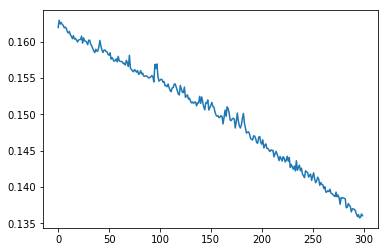

In [23]:
plt.plot(history.history['loss']+history2.history['loss']+history3.history['loss']+history4.history['loss'])
plt.show()

In [21]:
# predict test set and save
predictions = model.predict([X1_test, X2_test])

for j in range(len(predictions)):
    save_png(predictions[j], file_name='noZ_200_epochs/'+str(j))

In [19]:
# save test results to .npy file
def save_results(X1_test, X2_test, predictions, file_name='supervised_noZ0.npy'):
    ''' stack test set inputs and outputs to numpy array and save '''
    x1 = np.rollaxis(X1_test, 3, 1)[:,np.newaxis,[2,1,0],:,:]
    x2 = np.rollaxis(X2_test, 3, 1)[:,np.newaxis,[2,1,0],:,:]
    y_pred = np.rollaxis(np.array(predictions), 3, 1)[:,np.newaxis,[2,1,0],:,:]
    stacked = np.hstack([x1,x2,y_pred])
    np.save(file_name, stacked)

save_results(X1_test, X2_test, predictions, file_name='supervised_noZ0.npy')

In [24]:
def process_image(filename):
    ''' preprocess image to get ready for keras input '''
    npy = np.rollaxis(np.load(filename), 0, 3)
    npy[:,:,[0,1,2]] = npy[:,:,[2,1,0]]
    return npy.reshape(1,64,64,3)

def generate_child(model, parent_idx):
    ''' predict multiple children from one parent pair '''
    parent1 = process_image('GAN_data/parent'+str(parent_idx)+'a.npy')
    parent2 = process_image('GAN_data/parent'+str(parent_idx)+'b.npy')
    prediction = model.predict([parent1, parent2])[0]
    save_png(prediction, file_name='GAN_compare/supervised/'+str(parent_idx))

In [25]:
for i in range(4):
    generate_child(model, i+1)